In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load PDF table into dataframe
df = pd.read_csv("menu.csv")  # If you've converted PDF to CSV
# If it's still PDF, use tabula-py or camelot to extract (let me know if you need that code)

# Check the first few rows
print(df.head())
print(df.info())

# Clean column names (remove spaces)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Handle missing values if any
df = df.fillna(0)

    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

In [2]:
# Summary statistics
print(df.describe())

# Top 5 highest calorie items
print(df[['Item', 'Calories']].sort_values(by='Calories', ascending=False).head())

# Average calories per category
avg_calories = df.groupby('Category')['Calories'].mean().sort_values(ascending=False)
print(avg_calories)

          Calories  Calories_from_Fat   Total_Fat  Total_Fat_(%_Daily_Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated_Fat  Saturated_Fat_(%_Daily_Value)   Trans_Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9240\700284606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_calories.index, y=avg_calories.values, palette="viridis")


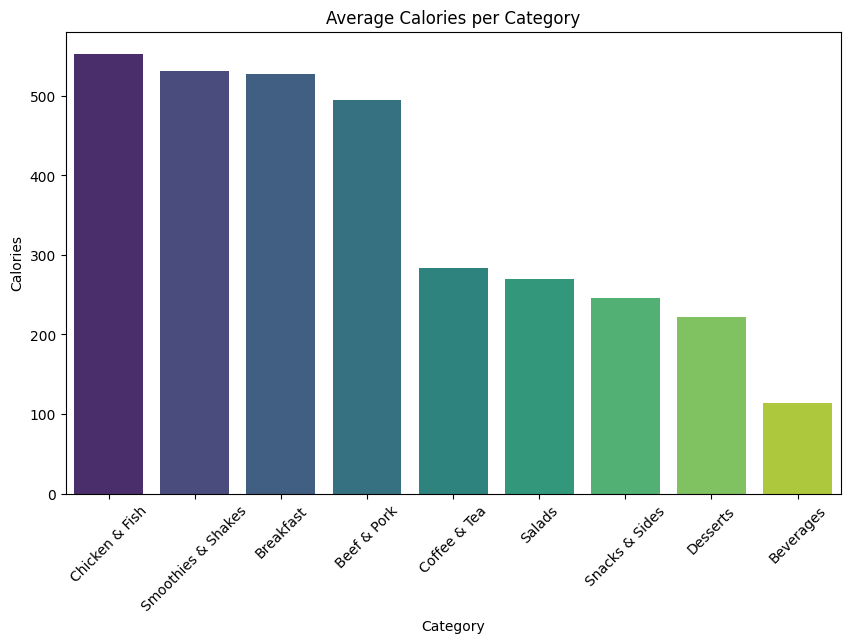

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_calories.index, y=avg_calories.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Calories per Category")
plt.ylabel("Calories")
plt.legend([],[], frameon=False)  # removes any unused legend
plt.show()

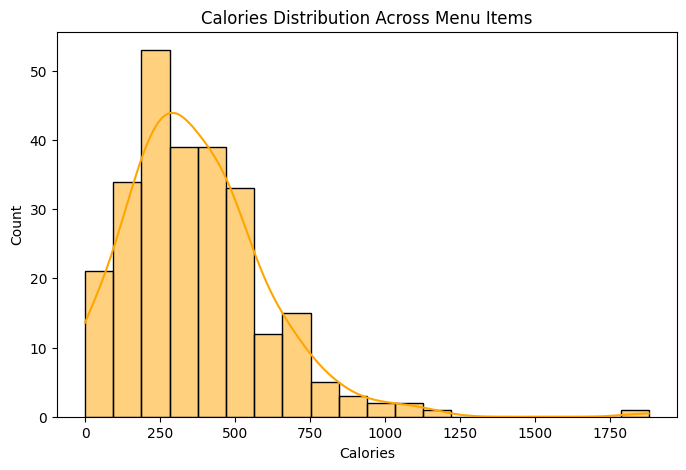

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Calories'], bins=20, kde=True, color='orange')
plt.title("Calories Distribution Across Menu Items")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.show()

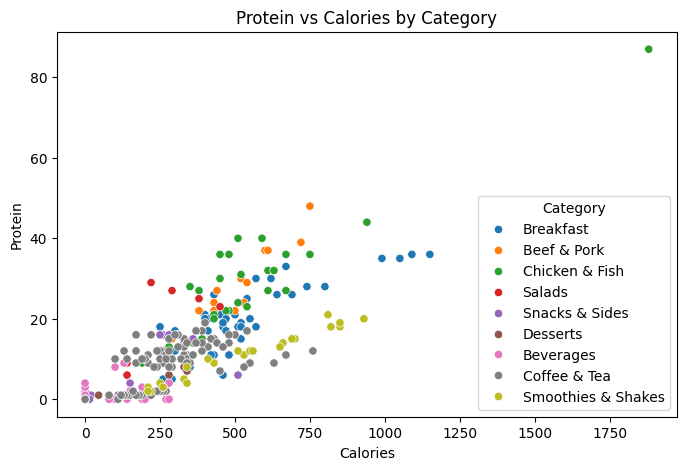

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Calories', y='Protein', data=df, hue='Category')
plt.title("Protein vs Calories by Category")
plt.show()

### Recommendations:
- Identify and promote low-calorie, high-protein items.
- Categories like X have the highest average calories; adjust portion size or ingredients.
- Use insights to design a balanced menu for different diet needs.
-